In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Is there a specific features captured by each principal component? 

### First step, the orbital region

We got information from the heritability study on the covariates which are the age, the age², the sex, and others...

We can highlight those correlations when they are significant by working with the table : 


| Label | Base | Side | Covariates       | Class | H2  | Std. err | p         |
|-------|------|------|------------------|-------|-----|----------|-----------|
| 1stPC | HCP  | Left | SEX p = 0.0542398| PCA   | 0.0 | 0.0      | 5.0e-01   |
| 2dPC  | HCP  | Left | SEX p = 0.0983290| PCA   | 0.18| 0.06     | 2.2e-03   |
| 3dPC  | HCP  | Left | Age^2 p = 0.0279798| PCA | 0.18| 0.17     | 1.5e-01   |
| 4thPC | HCP  | Left | Age^2 p = 0.0133047| PCA | 0.24| 0.07     | 7.1e-05   |
| 5thPC | HCP  | Left |                  | PCA   | 0.06| 0.07     | 1.7e-01   |



First, we need the info for the HCP subjects.

In [4]:
HCP_info = pd.read_csv('/neurospin/dico/data/deep_folding/current/datasets/hcp/participants.csv')
HCP_info.head()

,Subject,Release,Acquisition,Gender,Age,3T_Full_MR_Compl,T1_Count,T2_Count,3T_RS-fMRI_Count,3T_RS-fMRI_PctCompl,...,Odor_Unadj,Odor_AgeAdj,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final,Flanker_AgeAdj_class
0,100004,S900,Q06,M,22-25,False,0,0,0,0.0,...,101.12,86.45,2.0,45.9,107.17,105.31,1.80,0.0,1.80,1
1,100206,S900,Q11,M,26-30,True,1,1,4,100.0,...,108.79,97.19,1.0,49.7,72.63,72.03,1.84,0.0,1.84,1
2,100307,Q1,Q01,F,26-30,True,1,1,4,100.0,...,101.12,86.45,0.0,38.6,71.69,71.76,1.76,0.0,1.76,1
3,100408,Q3,Q03,M,31-35,True,1,1,4,100.0,...,108.79,98.04,2.0,52.6,114.01,113.59,1.76,2.0,1.68,1
4,100610,S900,Q08,M,26-30,True,2,1,4,100.0,...,122.25,110.45,0.0,38.6,84.84,85.31,1.92,1.0,1.88,1


Then we need the principal components values for each subject.

In [5]:
PC = pd.read_csv('/neurospin/dico/adufournet/Runs/08_Heritability_Left_Orbital_HCP_dim256/Heritability/data/HCP_PCS.csv')
PC = PC.rename(columns={'IID':'Subject'})
PC.head()

,Subject,1stPC,2dPC,3dPC,4thPC,5thPC
0,100206,-1.000116,0.765618,-5.454947,-4.520021,1.066605
1,100307,8.386410,1.359404,0.098075,1.020627,-1.765564
2,100408,8.347238,5.250474,1.722335,-7.335495,2.293250
3,100610,12.729933,-0.628716,-4.215525,-2.245104,-2.620512
4,101006,9.950007,2.631718,-7.786885,2.585785,3.452239


In [6]:
HCP = pd.merge(PC, HCP_info, on=['Subject'], how='inner')

And now we are ready to plot what's supposed to be correlated.

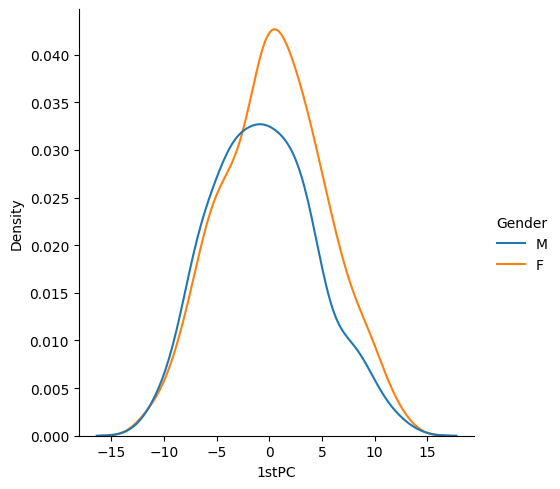

In [7]:
sns.displot(data=HCP, x='1stPC', hue='Gender', kind="kde")
plt.show()

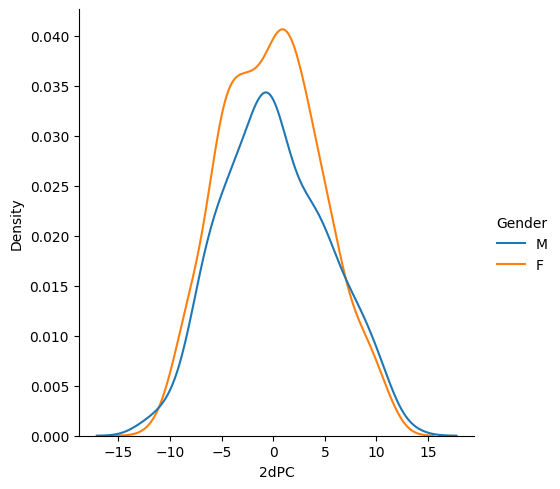

In [8]:
sns.displot(data=HCP, x='2dPC', hue='Gender', kind="kde") #,stat="density")
plt.show()

In [ ]:
HCP['Age'].unique()

def mean_age(age):
    dic_age = {'22-25': 23.5, '26-30':28, '31-35':33, '36+':37 }
    return dic_age[age]


HCP['Age_int'] = HCP['Age'].apply(mean_age)

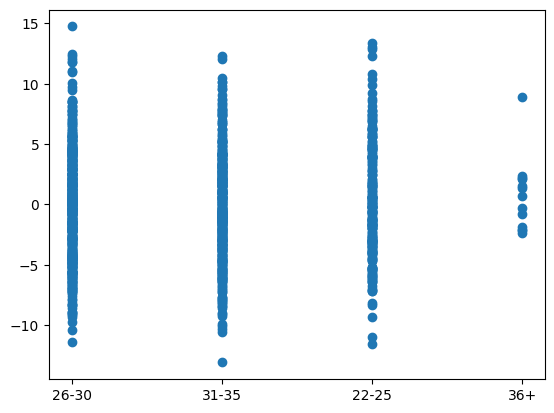

In [9]:
plt.scatter(HCP['Age'], HCP['3dPC'])
plt.show()

### Second step, the paracingular region